# 2절 분류모형

## 4. 확률적 판별모형

In [1]:
# 의사결정나무 모형 생성
from sklearn.datasets import load_iris
data = load_iris()
X = data.data[:, 2:]
y = data.target
feature_names = data.feature_names[2:]
feature_names

['petal length (cm)', 'petal width (cm)']

In [2]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(criterion='entropy', max_depth=1, random_state=0)
dt_model.fit(X, y)

DecisionTreeClassifier(criterion='entropy', max_depth=1, random_state=0)

In [3]:
import io
from sklearn.tree import export_graphviz
import pydot
from IPython.core.display import Image

def draw_decision_tree(model,feature_names=feature_names):
    dot_buf = io.StringIO()
    export_graphviz(model, out_file=dot_buf ,feature_names=feature_names)
    graph = pydot.graph_from_dot_data(dot_buf.getvalue())[0]
    image = graph.create_png()

    return Image(image)

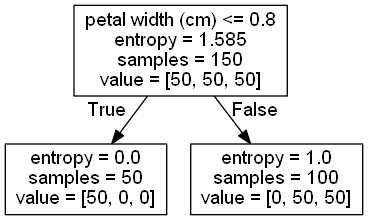

In [4]:
draw_decision_tree(dt_model, feature_names=feature_names)

In [5]:
dt_model5 = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=0)
dt_model5.fit(X, y)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=0)

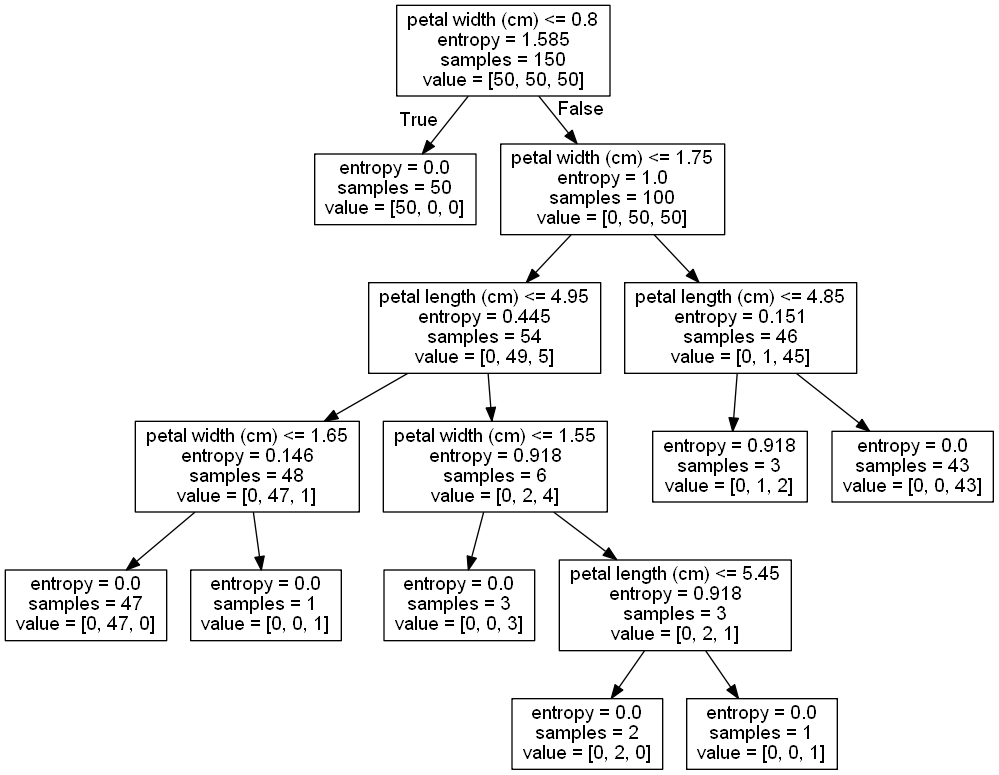

In [6]:
draw_decision_tree(dt_model5, feature_names=feature_names)

## 5. 판별함수 기반 모형

## 6. 다중 클래스 분류

In [7]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target

In [8]:
from sklearn.multiclass import OneVsOneClassifier
from sklearn.linear_model import LogisticRegression

model_ovo = OneVsOneClassifier(LogisticRegression())
model_ovo.fit(X, y)

OneVsOneClassifier(estimator=LogisticRegression())

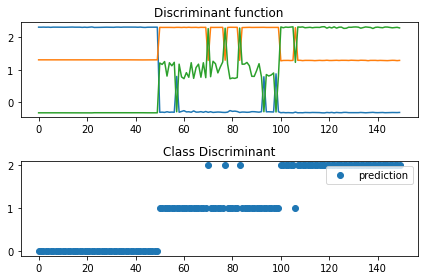

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

ax1 = plt.subplot(211)
pd.DataFrame(model_ovo.decision_function(X)).plot(ax=ax1, legend=False)
plt.title('Discriminant function')

ax2 = plt.subplot(212)
pd.DataFrame(model_ovo.predict(X), columns=['prediction']).plot(marker='o', ls='', ax=ax2)
plt.title('Class Discriminant')

plt.tight_layout()
plt.show()

In [10]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression

model_ovr = OneVsRestClassifier(LogisticRegression())
model_ovr.fit(X, y)

OneVsRestClassifier(estimator=LogisticRegression())

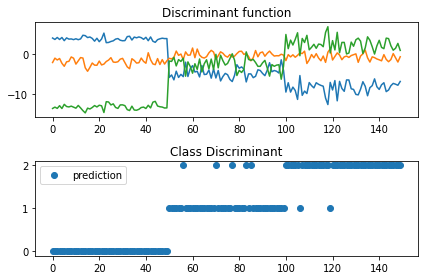

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

ax1 = plt.subplot(211)
pd.DataFrame(model_ovr.decision_function(X)).plot(ax=ax1, legend=False)
plt.title('Discriminant function')

ax2 = plt.subplot(212)
pd.DataFrame(model_ovr.predict(X), columns=['prediction']).plot(marker='o', ls='', ax=ax2)
plt.title('Class Discriminant')

plt.tight_layout()
plt.show()

# 3. 인공신경망